In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\samee\Desktop\qc-hackathon\qc-hackathon\substance-abuse\data\Train\HackTrain.csv')
test = pd.read_csv(r'C:\Users\samee\Desktop\qc-hackathon\qc-hackathon\substance-abuse\data\Test\HackTest.csv')

In [3]:
len(test.columns)

63

In [4]:
train.head()
train.head()

,CASEID,YEAR,SERVSETA,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,...,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY
0,416562.0,2014,7,2014,7,2,5,5,4,4,...,0,0,0,0,0,2,8,-9,4,5
1,575373.0,2014,2,2014,7,1,5,5,1,5,...,0,0,0,0,0,1,9,2,1,1
2,600710.0,2014,6,2014,11,1,5,5,1,3,...,0,0,0,0,0,2,-9,2,4,5
3,859386.0,2014,7,2014,5,1,5,1,1,4,...,0,0,0,0,0,2,-9,2,3,-9
4,1257784.0,2014,7,2014,8,2,5,5,-9,5,...,0,0,0,0,0,2,5,-9,-9,-9


In [8]:
#train = train.drop('YEAR', axis=1)
#train = train.drop('CASEID', axis=1)
#test = test.drop('YEAR', axis=1)
test = test.drop('CASEID', axis=1)
test.head()
test.columns

Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'DETCRIM', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU', 'ALCFLG', 'COKEFLG',
       'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG',
       'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG',
       'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG', 'DSMCRIT',
       'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')

In [9]:
X_NO_LOS = train.drop('LOS', axis=1)


X_NO_REASON = train.drop('REASON', axis=1)
X_NO_LOS_REASON = X_NO_LOS.drop('REASON', axis=1)

Y_LOS = train['LOS']
Y_REASON = train['REASON']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_LOS, test_size=.33, random_state=101)
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
predictions = XGB.predict(X_test)


from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_LOS, test_size=.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
linearPred = lm.predict(test)

In [97]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.123223339994675

In [99]:
# Predicting the Reason, 1 or 0.
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_REASON, test_size=.4, random_state=101)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
predictions = log.predict(X_test)
logPred = log.predict(test)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.67      0.79      0.73    319024
          1       0.65      0.49      0.56    243305

avg / total       0.66      0.66      0.65    562329



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_REASON, test_size=.33, random_state=101)
SVC = SVC()
SVC.fit(X_train, y_train)
predictions = SVC.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
exp = pd.DataFrame([linearPred,logPred], dtype=float)

In [111]:
exp.transpose()

,0,1
0,27.963745,0.0
1,32.084229,0.0
2,30.364746,0.0
3,31.508911,1.0
4,9.158203,1.0
5,20.049316,0.0
6,33.299194,0.0
7,31.203613,0.0
8,33.571899,0.0
9,31.083496,0.0


In [122]:
t = pd.read_csv(r'C:\Users\samee\Desktop\QC Hackathon\qc-hackathon\qc-hackathon\substance-abuse\data\Test\HackTest.csv')

In [113]:
t.columns

Index(['CASEID', 'SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC',
       'MARSTAT', 'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG',
       'PRIMINC', 'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION',
       'SERVSETD', 'METHUSE', 'DAYWAIT', 'PSOURCE', 'DETCRIM', 'NOPRIOR',
       'SUB1', 'ROUTE1', 'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2',
       'FRSTUSE2', 'SUB3', 'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU',
       'ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG',
       'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG',
       'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG',
       'ALCDRUG', 'DSMCRIT', 'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')

In [115]:
exp['CASEID'] = t['CASEID']

In [125]:
tran = exp.transpose()

In [131]:
tran['CASEID'] = t['CASEID']
tran.head()

,0,1,CASEID
0,27.963745,0.0,18.0
1,32.084229,0.0,53.0
2,30.364746,0.0,57.0
3,31.508911,1.0,74.0
4,9.158203,1.0,79.0


In [133]:
tran = tran[['CASEID', 0, 1]]
tran.head()

,CASEID,0,1
0,18.0,27.963745,0.0
1,53.0,32.084229,0.0
2,57.0,30.364746,0.0
3,74.0,31.508911,1.0
4,79.0,9.158203,1.0


In [102]:
tran.to_csv(path_or_buf=r'C:\Users\samee\Desktop\QC Hackathon\qc-hackathon\qc-hackathon\substance-abuse\submission.csv', header=False)

NameError: name 'tran' is not defined

In [103]:
X_NO_LOS_REASON_DROP = X_NO_LOS.drop('ROUTE2', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('FREQ2', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('FRSTUSE2', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('ROUTE3', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('FREQ3', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('FRSTUSE3', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('IDU', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('DETCRIM', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('DSMCRIT', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('HLTHINS', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('PRIMPAY', axis=1)
X_NO_LOS_REASON_DROP = X_NO_LOS_REASON_DROP.drop('REASON', axis=1)


test2 = test.drop('ROUTE2', axis=1)
test2 = test2.drop('FREQ2', axis=1)
test2 = test2.drop('FRSTUSE2', axis=1)
test2 = test2.drop('ROUTE3', axis=1)
test2 = test2.drop('FREQ3', axis=1)
test2 = test2.drop('FRSTUSE3', axis=1)
test2 = test2.drop('IDU', axis=1)
test2 = test2.drop('DETCRIM', axis=1)
test2 = test2.drop('DSMCRIT', axis=1)
test2 = test2.drop('HLTHINS', axis=1)
test2 = test2.drop('PRIMPAY', axis=1)


In [160]:
print(X_NO_LOS_REASON_DROP.columns)
print(test2.columns)

Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'NOPRIOR', 'SUB1', 'ROUTE1', 'FREQ1',
       'FRSTUSE1', 'SUB2', 'SUB3', 'NUMSUBS', 'ALCFLG', 'COKEFLG', 'MARFLG',
       'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG',
       'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG',
       'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG', 'PSYPROB'],
      dtype='object')
Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'NOPRIOR', 'SUB1', 'ROUTE1', 'FREQ1',
       'FRSTUSE1', 'SUB2', 'SUB3', 'NUMSUBS', 'ALCFLG', 'COKEFLG', 'MARFLG',
       'HERFLG', 'METHFLG',

In [104]:
len(test2.columns)

51

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_LOS, test_size=.8, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
linearPred = lm.predict(test)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.121117367610182

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_REASON, test_size=.33, random_state=101)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
predictions = log.predict(X_test)
logPred = log.predict(test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.67      0.79      0.73    263352
          1       0.64      0.49      0.56    200570

avg / total       0.66      0.66      0.65    463922



In [176]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_REASON, test_size=.33, random_state=101)

Gauss = GaussianNB()

Gauss.fit(X_train, y_train)
print(Gauss)

predictions = Gauss.predict(X_test)
print(classification_report(y_test, predictions))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.66      0.78      0.71    263352
          1       0.62      0.46      0.53    200570

avg / total       0.64      0.64      0.63    463922



In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_REASON, test_size=.33, random_state=101)

Bern = BernoulliNB()

Bern.fit(X_train, y_train)
print(Bern)

predictions = Bern.predict(X_test)
print(classification_report(y_test, predictions))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
             precision    recall  f1-score   support

          0       0.64      0.66      0.65    263352
          1       0.53      0.51      0.52    200570

avg / total       0.59      0.59      0.59    463922



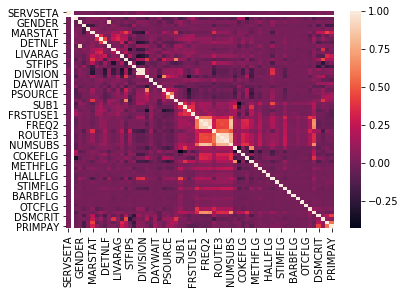

In [230]:
sns.heatmap(train.corr())

In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_NO_LOS_REASON)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [234]:
scaled_data = scaler.transform(X_NO_LOS_REASON)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, Y_LOS, test_size=.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
linearPred = lm.predict(test)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.127024201042731

In [237]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, Y_REASON, test_size=.4, random_state=101)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
predictions = log.predict(X_test)
logPred = log.predict(test)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.67      0.79      0.73    319024
          1       0.65      0.50      0.56    243305

avg / total       0.66      0.67      0.66    562329



In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON, Y_REASON, test_size=.6, random_state=101)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.69      0.68      0.68    478289
          1       0.59      0.59      0.59    365205

avg / total       0.64      0.64      0.64    843494



In [107]:
X_NO_LOS_REASON.columns

Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'DETCRIM', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU', 'ALCFLG', 'COKEFLG',
       'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG',
       'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG',
       'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG', 'DSMCRIT',
       'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')

In [108]:
removeBad = train
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(removeBad)

In [109]:
#removeBad = removeBad.drop('LOS', axis=1)
#removeBad = removeBad.drop('REASON', axis=1)
#removeBad.columns



In [110]:
removeTest = test
#removeTest = removeTest.drop('LOS', axis=1)
#removeTest = removeTest.drop('REASON', axis=1)
removeTest.columns
len(removeTest.columns)

62

In [111]:
removeBad = removeBad[removeBad.GENDER != -9]
removeBad = removeBad[removeBad.RACE != -9]
removeBad = removeBad[removeBad.ETHNIC != -9]
removeBad = removeBad[removeBad.MARSTAT != -9]
removeBad = removeBad[removeBad.EDUC != -9]
removeBad = removeBad[removeBad.EMPLOY != -9]
removeBad = removeBad[removeBad.DETNLF != -9] #
removeBad = removeBad[removeBad.PREG != -9] #
removeBad = removeBad[removeBad.VET != -9]
removeBad = removeBad[removeBad.LIVARAG != -9]
removeBad = removeBad[removeBad.PRIMINC != -9]
removeBad = removeBad[removeBad.ARRESTS != -9]
removeBad = removeBad[removeBad.STFIPS != -9]
removeBad = removeBad[removeBad.CBSA != -9]
removeBad = removeBad[removeBad.REGION != -9]


In [112]:
X_NO_LOS_REASON2 = removeBad.drop('REASON', axis=1)
X_NO_LOS_REASON2 = X_NO_LOS_REASON2.drop('LOS', axis=1)
Y_LOS2 = removeBad['LOS']
Y_REASON2 = removeBad['REASON']

In [113]:
len(X_NO_LOS_REASON2.columns)

62

In [114]:
#X_NO_LOS_REASON2 = X_NO_LOS_REASON2.drop('REASON', axis=1)
X_NO_LOS_REASON2.columns

Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'DETCRIM', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU', 'ALCFLG', 'COKEFLG',
       'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG',
       'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG',
       'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG', 'DSMCRIT',
       'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')

In [115]:
removeTest.columns

Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'DETCRIM', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU', 'ALCFLG', 'COKEFLG',
       'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG',
       'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG',
       'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG', 'DSMCRIT',
       'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')

In [116]:
removeTest = test
removeTest = removeTest[removeTest.GENDER != -9]
removeTest = removeTest[removeTest.RACE != -9]
removeTest = removeTest[removeTest.ETHNIC != -9]
removeTest = removeTest[removeTest.MARSTAT != -9]
removeTest = removeTest[removeTest.EDUC != -9]
removeTest = removeTest[removeTest.EMPLOY != -9]
removeTest = removeTest[removeTest.DETNLF != -9] #
removeTest = removeTest[removeTest.PREG != -9] #
removeTest = removeTest[removeTest.VET != -9]
removeTest = removeTest[removeTest.LIVARAG != -9]
removeTest = removeTest[removeTest.PRIMINC != -9]
removeTest = removeTest[removeTest.ARRESTS != -9]
removeTest = removeTest[removeTest.STFIPS != -9]
removeTest = removeTest[removeTest.CBSA != -9]
removeTest = removeTest[removeTest.REGION != -9]

In [117]:
print(removeTest.columns)
print(removeBad.columns)

Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'PSOURCE', 'DETCRIM', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'NUMSUBS', 'IDU', 'ALCFLG', 'COKEFLG',
       'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG',
       'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG',
       'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'ALCDRUG', 'DSMCRIT',
       'PSYPROB', 'HLTHINS', 'PRIMPAY'],
      dtype='object')
Index(['SERVSETA', 'DISYR', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT',
       'EDUC', 'EMPLOY', 'DETNLF', 'PREG', 'VET', 'LIVARAG', 'PRIMINC',
       'ARRESTS', 'STFIPS', 'CBSA', 'REGION', 'DIVISION', 'SERVSETD',
       'METHUSE', 'DAYWAIT', 'REASON', 'LOS', 'PSOURCE'

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON2, Y_REASON2, test_size=.4, random_state=101)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
predictions = log.predict(X_test)
logPred = log.predict(removeTest)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.70      0.84      0.76     18605
          1       0.64      0.43      0.52     12029

avg / total       0.67      0.68      0.66     30634



In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON2, Y_LOS2, test_size=.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
linearPred = lm.predict(test)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.643227470291112

In [125]:
exp = pd.DataFrame([linearPred,logPred], dtype=float).transpose()
exp['CASEID'] = t['CASEID']
exp = exp[['CASEID', 0, 1]]
exp.to_csv(path_or_buf=r'C:\Users\samee\Desktop\qc-hackathon\qc-hackathon\predictions.csv',header=False)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON2, Y_REASON2, test_size=.33, random_state=101)

Bern = BernoulliNB()

Bern.fit(X_train, y_train)
print(Bern)

predictions = Bern.predict(X_test)
print(classification_report(y_test, predictions))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
             precision    recall  f1-score   support

          0       0.65      0.71      0.68     15337
          1       0.47      0.41      0.44      9936

avg / total       0.58      0.59      0.58     25273



In [345]:
X_train, X_test, y_train, y_test = train_test_split(X_NO_LOS_REASON2, Y_REASON2, test_size=.33, random_state=101)

Gauss = GaussianNB()

Gauss.fit(X_train, y_train)
print(Gauss)

predictions = Gauss.predict(X_test)
print(classification_report(y_test, predictions))

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.69      0.75      0.72     15337
          1       0.56      0.49      0.52      9936

avg / total       0.64      0.65      0.64     25273



In [75]:
df = train.sample(n=10000,replace=False)
dft = test.sample(n=10000, replace=False)
dft = dft.drop('CASEID', axis=1)

In [79]:
df['GENDER'] = df['GENDER'].replace(-9, np.nan)
df['GENDER'] = df['GENDER'].fillna(1)

df['DETCRIM'] = df['DETCRIM'].replace(-9, np.nan)
df['DETCRIM'] = df['DETCRIM'].fillna(3)

df['ROUTE2'] = df['ROUTE2'].replace(-9, np.nan)
df['ROUTE2'] = df['ROUTE2'].fillna(2)

df['FREQ2'] = df['FREQ2'].replace(-9, np.nan)
df['FREQ2'] = df['FREQ2'].fillna(1)

df['ROUTE3'] = df['ROUTE3'].replace(-9, np.nan)
df['ROUTE3'] = df['ROUTE3'].fillna(2)

df['FREQ3'] = df['FREQ3'].replace(-9, np.nan)
df['FREQ3'] = df['FREQ3'].fillna(1)

In [80]:
dft['GENDER'] = dft['GENDER'].replace(-9, np.nan)
dft['GENDER'] = dft['GENDER'].fillna(1)

dft['DETCRIM'] = dft['DETCRIM'].replace(-9, np.nan)
dft['DETCRIM'] = dft['DETCRIM'].fillna(3)

dft['ROUTE2'] = dft['ROUTE2'].replace(-9, np.nan)
dft['ROUTE2'] = dft['ROUTE2'].fillna(2)

dft['FREQ2'] = dft['FREQ2'].replace(-9, np.nan)
dft['FREQ2'] = dft['FREQ2'].fillna(1)

dft['ROUTE3'] = dft['ROUTE3'].replace(-9, np.nan)
dft['ROUTE3'] = dft['ROUTE3'].fillna(2)

dft['FREQ3'] = dft['FREQ3'].replace(-9, np.nan)
dft['FREQ3'] = dft['FREQ3'].fillna(1)

In [81]:
Y_los = df['LOS']
Y_res = df['REASON']
X_no_los_res = df.drop('REASON', axis=1)
X_no_los_res = X_no_los_res.drop('LOS', axis=1)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_no_los_res, Y_los, test_size=.4, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
linearPred = lm.predict(dft)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.386792423786096

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_no_los_res, Y_res, test_size=.4)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
predictions = log.predict(X_test)
logPred = log.predict(dft)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.68      0.81      0.74      2299
          1       0.65      0.48      0.55      1701

avg / total       0.66      0.67      0.66      4000

[[1861  438]
 [ 890  811]]
